In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

from collections import defaultdict
from itertools import izip

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn.manifold as sm


import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
print "Loaded {} samples, {} features, {} digits. Labels: {} of shape {}".format(n_samples, n_features, n_digits, labels, labels.shape)

Loaded 1797 samples, 64 features, 10 digits. Labels: [0 1 2 ..., 8 9 8] of shape (1797,)


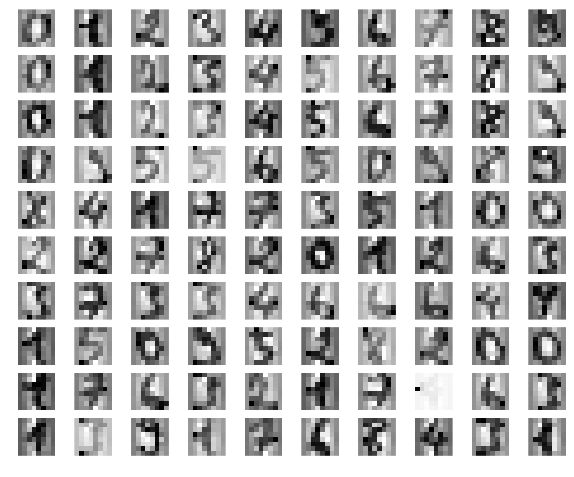

In [4]:
fig = plt.figure()
dim = 10

for i in xrange(dim * dim):
    a = fig.add_subplot(dim, dim, i + 1)
    plt.axis('off')
    imgplot = plt.imshow(np.reshape(data[i], (-1, 8)), cmap=plt.cm.binary, interpolation='none')

In [5]:
def save_data(labels, data, name):
    clusters = defaultdict(list)
    for l, img in izip(labels, data):
        clusters[l].append(img)

    for l in sorted(clusters.iterkeys()):
        dir_name = os.path.join('clusters', name)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)

        fig = plt.figure()
        dim = 2
        for idx, im in enumerate(clusters[l]):
            if idx > 15:
                break
            path = os.path.join(dir_name, str(l) + '_' + str(idx) + '.png')
            imgplot = plt.imshow(np.reshape(im, (-1, 8)), cmap=plt.cm.binary)
            fig.savefig(path)
            
        plt.close(fig)

In [26]:
save_files = False

sample_size = 300
def bench_estimator(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 13s   %.2fs   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0),
             # implement diffrent metrics here
             metrics.adjusted_mutual_info_score(labels, estimator.labels_),
             metrics.f1_score(labels, estimator.labels_),
             metrics.jaccard_similarity_score(labels, estimator.labels_),
             metrics.precision_score(labels, estimator.labels_),
             metrics.recall_score(labels, estimator.labels_),
             0
            ))
    
    if save_files:
        save_data(estimator.labels_, data, name)

bench_estimator(KMeans(init='random', n_clusters=n_digits, n_init=10), name="random", data=data)
bench_estimator(KMeans(init='k-means++', n_clusters=n_digits, n_init=10), name="random", data=data)
bench_estimator(AgglomerativeClustering(n_clusters=n_digits), name="Agglomerative", data=data)
bench_estimator(MiniBatchKMeans(n_clusters=n_digits, init='k-means++'), name="MiniBatchKMeans", data=data)
bench_estimator(MiniBatchKMeans(n_clusters=n_digits, init='random'), name="MiniBatchKMeans", data=data)

# implement different estimators here

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample

       random   0.25s   0.677   0.170   0.169   0.173   0.169    0.000
       random   0.23s   0.599   0.171   0.160   0.194   0.160    0.000

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


Agglomerative   3.85s   0.756   0.179   0.200   0.252   0.200    0.000

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl


MiniBatchKMeans   0.04s   0.630   0.024   0.020   0.034   0.020    0.000
MiniBatchKMeans   0.02s   0.651   0.107   0.120   0.098   0.120    0.000


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sampl

In [27]:
def plot_dataset(data, x, y, margin=50, frame=1000., imsize=8):
    x1 = (x - x.min()) * (frame / (x.max() - x.min())) + margin
    y1 = (y - y.min()) * (frame / (y.max() - y.min())) + margin
    image = np.zeros((x1.max() + margin + imsize, y1.max() + margin + imsize)) + 255
    print "Image size is %dx%d" % image.shape
    for k in xrange(data.shape[0]):
        image[x1[k]:x1[k]+8, y1[k]:y1[k]+8] = np.reshape(data[k], (-1, 8)) * 255
    plt.figure(figsize=(20, 20))
    plt.imshow(image, cmap=plt.cm.binary, interpolation='none')
    plt.axis("off")
    plt.show()

Image size is 1108x1108


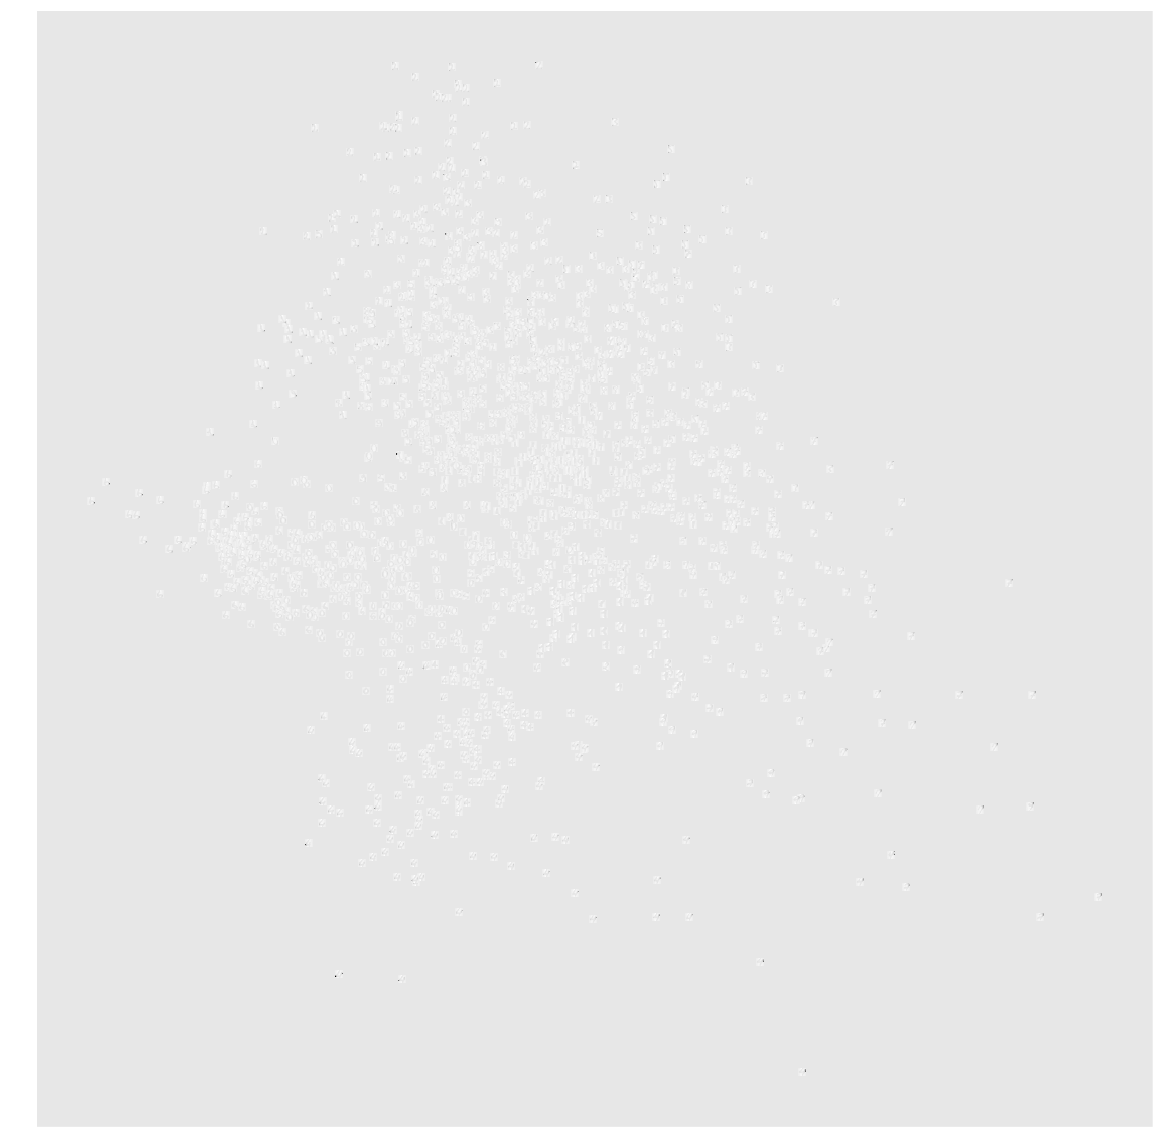

In [28]:
reduced_data = PCA(n_components=2).fit_transform(data)
plot_dataset(data, reduced_data[:, 0], reduced_data[:, 1])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.377622
[t-SNE] Error after 100 iterations with early exaggeration: 1.055879
[t-SNE] Error after 150 iterations: 0.944565
Image size is 1108x1108


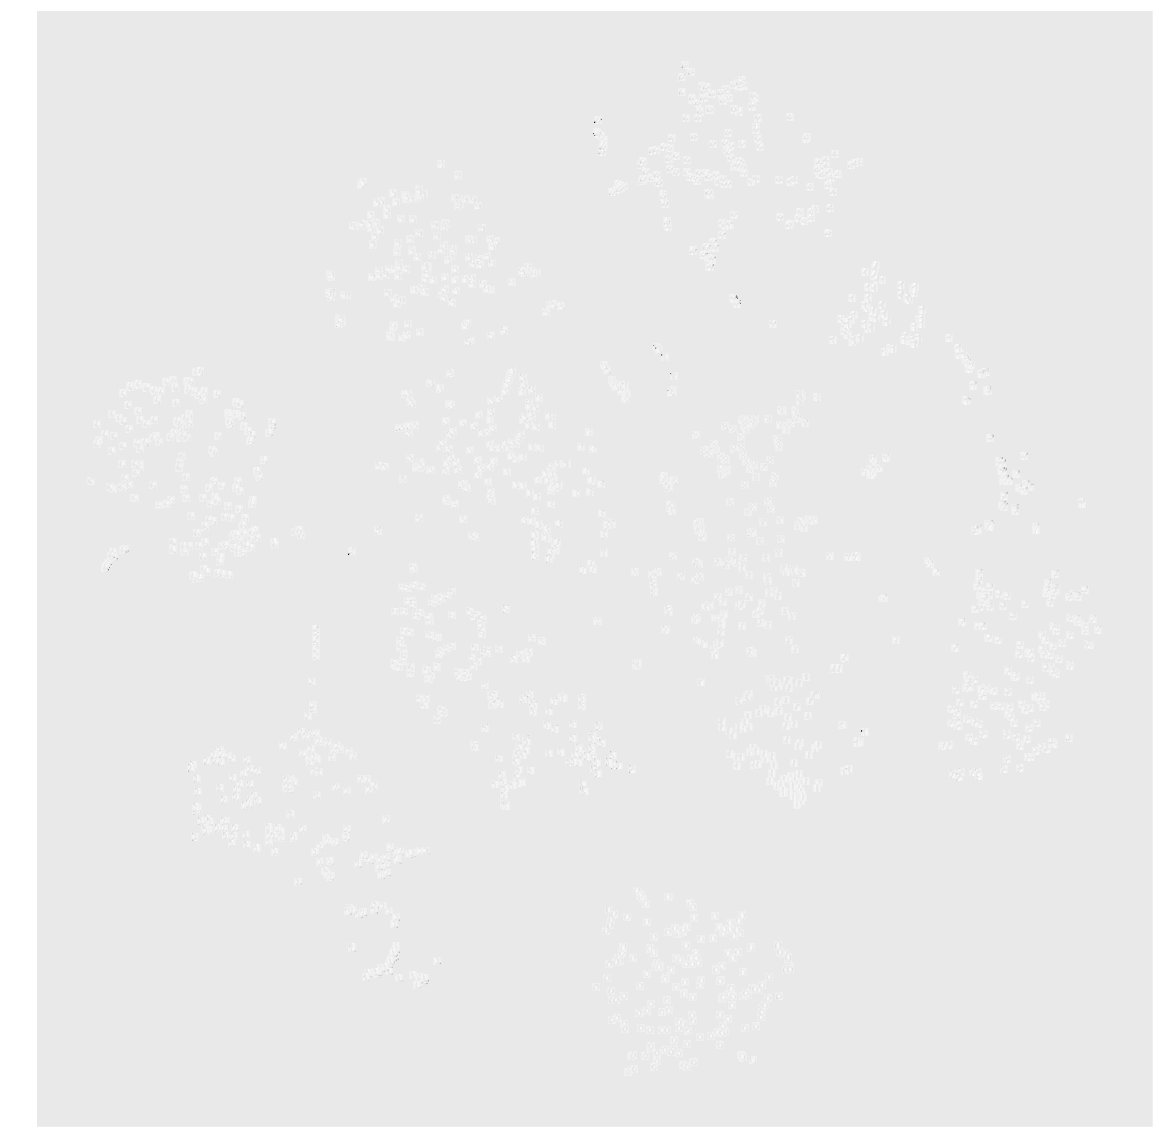

In [30]:
tsne = sm.TSNE(n_components=2, perplexity=30.0, verbose=1, n_iter=1000)
reduced_data = tsne.fit_transform(np.asfarray(data, dtype='float'))
plot_dataset(data, reduced_data[:, 0], reduced_data[:, 1])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.344975
[t-SNE] Error after 100 iterations with early exaggeration: 1.082518
[t-SNE] Error after 150 iterations: 0.965792
Image size is 1108x1108


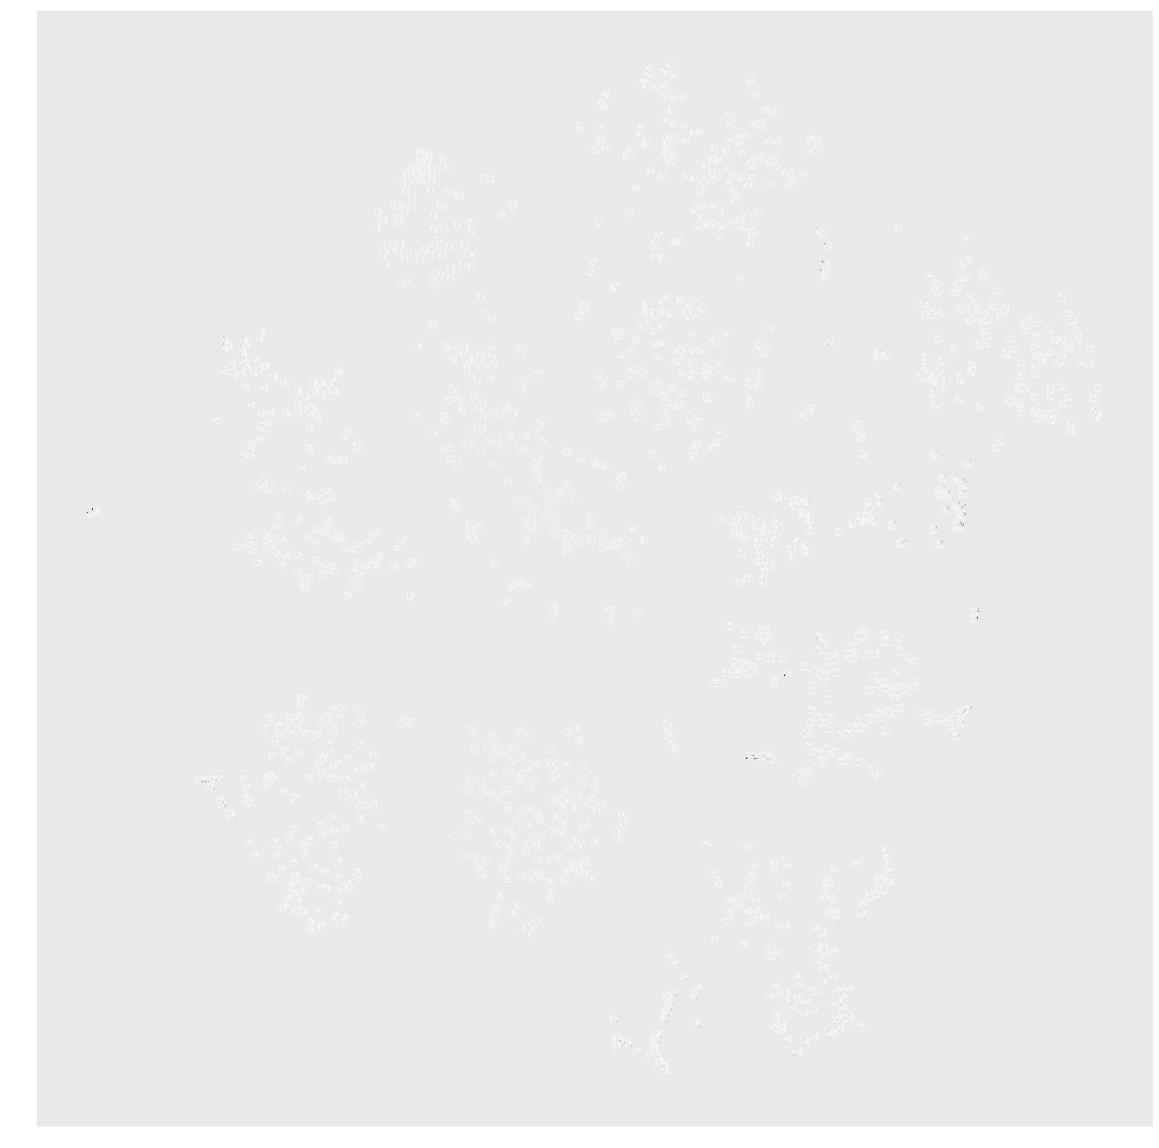

In [32]:
reduced_data = PCA(n_components=50).fit_transform(data)
tsne = sm.TSNE(n_components=2, perplexity=30.0, verbose=1, n_iter=1000)
reduced_data = tsne.fit_transform(np.asfarray(reduced_data, dtype='float'))
plot_dataset(data, reduced_data[:, 0], reduced_data[:, 1])